In [48]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

import matplotlib as plt
from matplotlib import pyplot

%matplotlib inline

### Loading and adding Headers

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(url, header=None)

df.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identify and handle missing values

In [5]:
# replace "?" with np.NAN
df.replace("?", np.NaN, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating for Missing Data
"True" means the value is a missing value while "False" means the value is not a missing value.

In [6]:
# nan = df.isna()
missing_data = df.isnull()

missing_data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column

In [7]:
for column in missing_data.columns.values.tolist():
  print(missing_data[column].value_counts())
  print()


symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

#### Deal with missing data
**How should you deal with missing data?**

1. Drop data
- Drop the whole row
- Drop the whole column
2. Replace data
- Replace it by mean
- Replace it by frequency
- Replace it based on other functions.


You should only drop whole columns if most entries in the column are empty.

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>

#### Calculate the mean value for the "normalized-losses" column and replace 'NaN' with the mean value

In [9]:
# Calculate mean()
avg_norm_loss = df['normalized-losses'].astype(float).mean(axis=0)

# Replace NaN
df['normalized-losses'].replace(np.NaN, avg_norm_loss, inplace=True)

df['normalized-losses'].head(10)

0    122.0
1    122.0
2    122.0
3      164
4      164
5    122.0
6      158
7    122.0
8      158
9    122.0
Name: normalized-losses, dtype: object

#### Calculate the mean value for the 'bore' column and Replace "NaN" with the mean value

In [21]:
# avg bore value
avg_bore = df['bore'].astype(float).mean(axis=0)

# Replace NaN
df['bore'].replace(np.nan, avg_bore, inplace=True)

df[['bore']].head()

,bore
0,3.47
1,3.47
2,2.68
3,3.19
4,3.19


#### Calculate the mean value for the 'stroke' column and Replace "NaN" with the mean value

In [22]:
# calculate avg stroke value
avg_stroke = df['stroke'].astype(float).mean(axis = 0)

df['stroke'].replace(np.nan, avg_stroke, inplace=True)

df[['stroke']].head()

,stroke
0,2.68
1,2.68
2,3.47
3,3.40
4,3.40


#### Calculate the mean value for the 'horsepower' column and Replace "NaN" with the mean value

In [25]:
# avg horsepower
avg_horsepower = df['horsepower'].astype(float).mean(axis=0)
print("Average Horsepower:", avg_horsepower)

# Replace NaN
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average Horsepower: 104.25615763546797


#### Calculate the mean value for the 'peak-rpm' column and Replace "NaN" with the mean value

In [26]:
# calculate avg peak-rpm
avg_peak_rpm = df['peak-rpm'].astype(float).mean(axis=0)
print("Avg peak-rpm:", avg_peak_rpm)

# replace nan
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

Avg peak-rpm: 5125.369458128079


#### Calculating for 'num-of-doors'

In [33]:
# View the values that are present in the column
df['num-of-doors'].value_counts()

# Get the most frequent
max_value = df['num-of-doors'].value_counts().idxmax()

# replace NaN with the most frequent
df['num-of-doors'].replace(np.nan, max_value, inplace=True)

#### Price: Drop all rows that do not have price data and **Reset** index

In [34]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [35]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Convert data types to proper format

In [36]:
df[['bore', 'stroke']] = df[["bore", "stroke"]].astype(float)
df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
df[["price"]] = df[["price"]].astype(float)
df[["peak-rpm"]] = df[["peak-rpm"]].astype(float)

# Data Standardization
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.<p>

#### Apply data transformation to transform mpg into L/100km

In [40]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-mpg'] = 235/df['city-mpg']

df['highway-mpg'] = 235 / df['highway-mpg']

# rename
df.rename(columns={'city-mpg': 'city-L/100km', 'highway-mpg': 'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0


# Data Normalization
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include
<p>


- scaling the variable so the variable average is 0 
- scaling the variable so the variance is 1 
- scaling the variable so the variable values range from 0 to 1  


#### Normalize length, width and height
**Method:** Simple Feature Scaling

In [41]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.
<p>

In [47]:
# convert data type
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Plot the histogram of horsepower to see the distribution of horsepower.

Text(0.5, 1.0, 'Horsepower Bins')

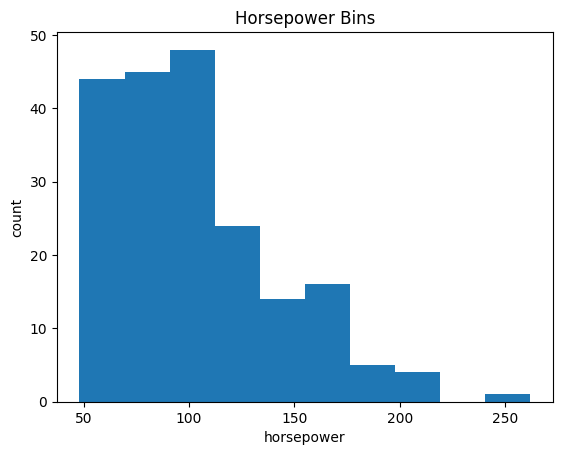

In [50]:
plt.pyplot.hist(df['horsepower'])

# set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel("count")  
plt.pyplot.title("Horsepower Bins")

#### Creating bins for the horsepower
Since we are building 3 bins of equal length, you need 4 dividers, so divider = 4.

In [55]:
divider = 4

# bins
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), divider)

bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Apply the function "cut" to determine what each value of df['horsepower'] belongs to.

In [58]:
grp_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=grp_names, include_lowest=True)

df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


View the number of vehicles in each bin

In [59]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

#### Plot the distribution of each bin

Text(0.5, 1.0, 'Horsepower Bins')

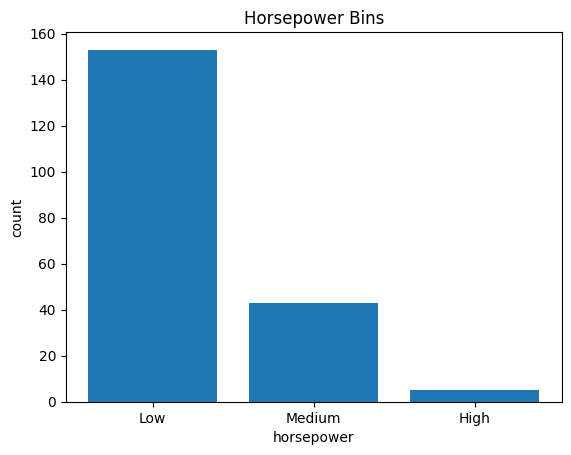

In [60]:
pyplot.bar(grp_names, df["horsepower-binned"].value_counts())

# set x/y labels and titles
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

<h3>Bins Visualization</h3>
Normally, you use a histogram to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'horsepower bins')

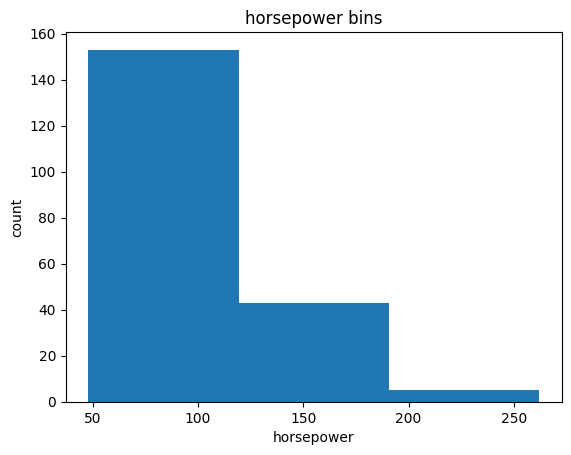

In [63]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Indicator Variable
**What is an indicator variables?**
<p>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
<p>

*Example*
<p>The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
<p>

In [69]:
# create dummy variable, prefix the column with 'fuel-type' and convert to int
dummy_variable_1 = pd.get_dummies(df["fuel-type"], prefix='fuel-type').astype(int)

dummy_variable_1.head()

,fuel-type_diesel,fuel-type_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [71]:
# Merge data frame 'df' and 'dummy_variable_1'
df = pd.concat([df, dummy_variable_1], axis=1)

# Drop original column 'fuel-type' from df
df.drop("fuel-type", axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type_diesel,fuel-type_gas,fuel-type_diesel,fuel-type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,27.0,13495.0,Low,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,27.0,16500.0,Low,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19.0,26.0,16500.0,Medium,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24.0,30.0,13950.0,Low,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18.0,22.0,17450.0,Low,0,1,0,1


#### Indicator variable on "aspiration"

In [78]:
# create dummy variable, prefix 'aspiration' and convert to 'int'
asp_dummy_var = pd.get_dummies(df['aspiration'], prefix='aspiration').astype(int)

# Merge dummy variable and df
df = pd.concat([df, asp_dummy_var], axis=1)

# drop the original column 'aspiration'
df.drop("aspiration", axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,price,horsepower-binned,fuel-type_diesel,fuel-type_gas,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,13495.0,Low,0,1,0,1,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,16500.0,Low,0,1,0,1,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,16500.0,Medium,0,1,0,1,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,13950.0,Low,0,1,0,1,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,17450.0,Low,0,1,0,1,1,0,1,0


# Save the new cleaned csv

In [79]:
df.to_csv('auto_clean_df.csv')